In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import lxml

insiders_df = pd.read_pickle("merge_etf_2.pkl")
insiders_df = insiders_df[insiders_df['acqdisp'] == 'A']

In [ ]:
insiders_df.columns

In [ ]:
insiders_df[['etf_ret', 'total_ret_6mo', 'acqdisp', 'sector', 'industry', 'datadate', 'net_ret']]

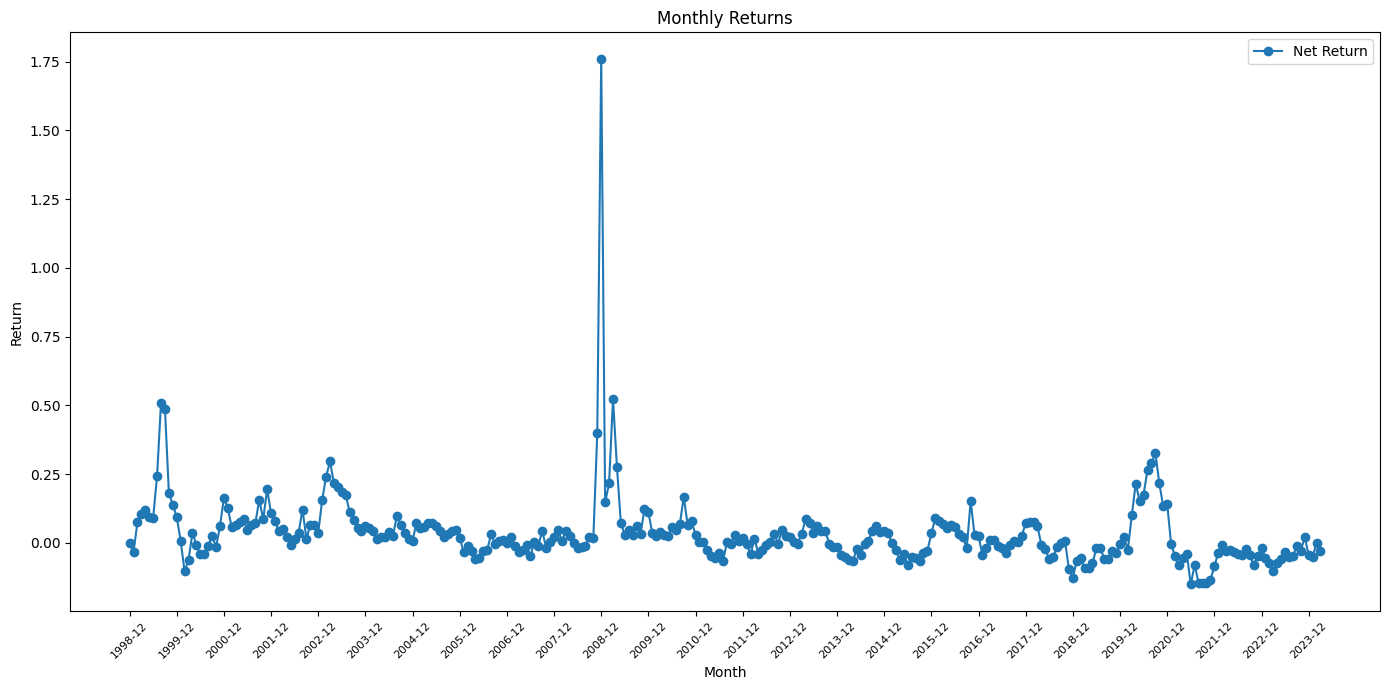

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'datadate' to datetime
insiders_df['datadate'] = pd.to_datetime(insiders_df['datadate'])

# Extract year and month
insiders_df['year_month'] = insiders_df['datadate'].dt.to_period('M')

# Group by 'year_month' and calculate mean of returns
monthly_means = insiders_df.groupby('year_month')[['total_ret_6mo', 'etf_ret', 'net_ret']].mean()

# Reset index to get 'year_month' as a column
monthly_means.reset_index(inplace=True)
monthly_means['year_month'] = monthly_means['year_month'].astype(str)

# Plot
plt.figure(figsize=(14, 7))
# plt.plot(monthly_means['year_month'], monthly_means['total_ret_6mo'], label='Total Return (6mo)', marker='o', linestyle='-')
# plt.plot(monthly_means['year_month'], monthly_means['etf_ret'], label='ETF Return', marker='o', linestyle='-')
plt.plot(monthly_means['year_month'], monthly_means['net_ret'], label='Net Return', marker='o', linestyle='-')

plt.title('Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Return')
plt.xticks(rotation=45, fontsize=8)
plt.xticks(monthly_means['year_month'][::12])  # Fewer x-ticks, assuming data span covers multiple years
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
import wrds
db = wrds.Connection(wrds_username='asherbaraban')

Loading library list...
Done


In [5]:
vols = db.get_table(library='cboe_all', table='cboe')

In [6]:
vols

,date,vixo,vixh,vixl,vix,vxoo,vxoh,vxol,vxo,vxno,vxnh,vxnl,vxn,vxdo,vxdh,vxdl,vxd
0,1986-01-02,None,None,None,None,17.93,18.71,17.40,18.07,None,None,None,None,None,None,None,None
1,1986-01-03,None,None,None,None,19.04,19.10,17.72,17.96,None,None,None,None,None,None,None,None
2,1986-01-06,None,None,None,None,17.99,18.17,17.05,17.05,None,None,None,None,None,None,None,None
3,1986-01-07,None,None,None,None,18.01,18.11,17.30,17.39,None,None,None,None,None,None,None,None
4,1986-01-08,None,None,None,None,18.04,21.15,16.63,19.97,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13333,2024-10-25,19.22,20.51,18.23,20.33,None,None,None,None,22.04,23.53,21.78,23.24,17.09,34.41,16.92,18.25
13334,2024-10-28,19.11,19.88,18.91,19.80,None,None,None,None,22.78,23.03,22.48,22.93,17.56,23.07,17.12,18.26
13335,2024-10-29,19.75,20.53,19.06,19.34,None,None,None,None,23.19,23.59,22.29,22.44,18.81,36.89,17.79,18.25
13336,2024-10-30,19.33,20.44,19.30,20.35,None,None,None,None,22.98,23.36,22.35,23.09,18.79,25.62,18.20,19.10


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'datadate' to datetime for returns data
insiders_df['datadate'] = pd.to_datetime(insiders_df['datadate'])
insiders_df['year_month'] = insiders_df['datadate'].dt.to_period('M')

# Group by 'year_month' and calculate mean of returns
monthly_means = insiders_df.groupby('year_month')[['total_ret_6mo', 'etf_ret', 'net_ret']].mean()
monthly_means.reset_index(inplace=True)
monthly_means['year_month'] = monthly_means['year_month'].astype(str)

# Convert 'date' to datetime for volatility data
vols['date'] = pd.to_datetime(vols['date'])
vols['year_month'] = vols['date'].dt.to_period('M')

# Calculate average volatility (example using 'vix')
vols['average_vol'] = vols[['vix']].mean(axis=1, skipna=True)
monthly_vol_means = vols.groupby('year_month')['average_vol'].mean().reset_index()
monthly_vol_means['year_month'] = monthly_vol_means['year_month'].astype(str)

# Merge with the returns data
monthly_data = pd.merge(monthly_means, monthly_vol_means, on='year_month', how='left')

# Plot
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Net Return
ax1.plot(monthly_data['year_month'], monthly_data['net_ret'], label='Net Return', marker='o', linestyle='-', color='steelblue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Return')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticks(monthly_data['year_month'][::12])  # Customize x-tick labels as needed
ax1.legend(loc='upper left')
# ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Average Volatility on the same plot with a second y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_data['year_month'], monthly_data['average_vol'], label='Average Volatility', color='purple', marker='o', linestyle='--')
ax2.set_ylabel('CBOE Volatility Index')
ax2.legend(loc='upper right')

plt.title('Monthly Returns and Average Volatility')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'date' is a datetime object
vols['date'] = pd.to_datetime(vols['date'])

# Select the indices to plot
indices = ['vix', 'vxo', 'vxn', 'vxd']

# Plot
plt.figure(figsize=(14, 7))
for index in indices:
    plt.plot(vols['date'], vols[index], label=index)

plt.title('Volatility Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

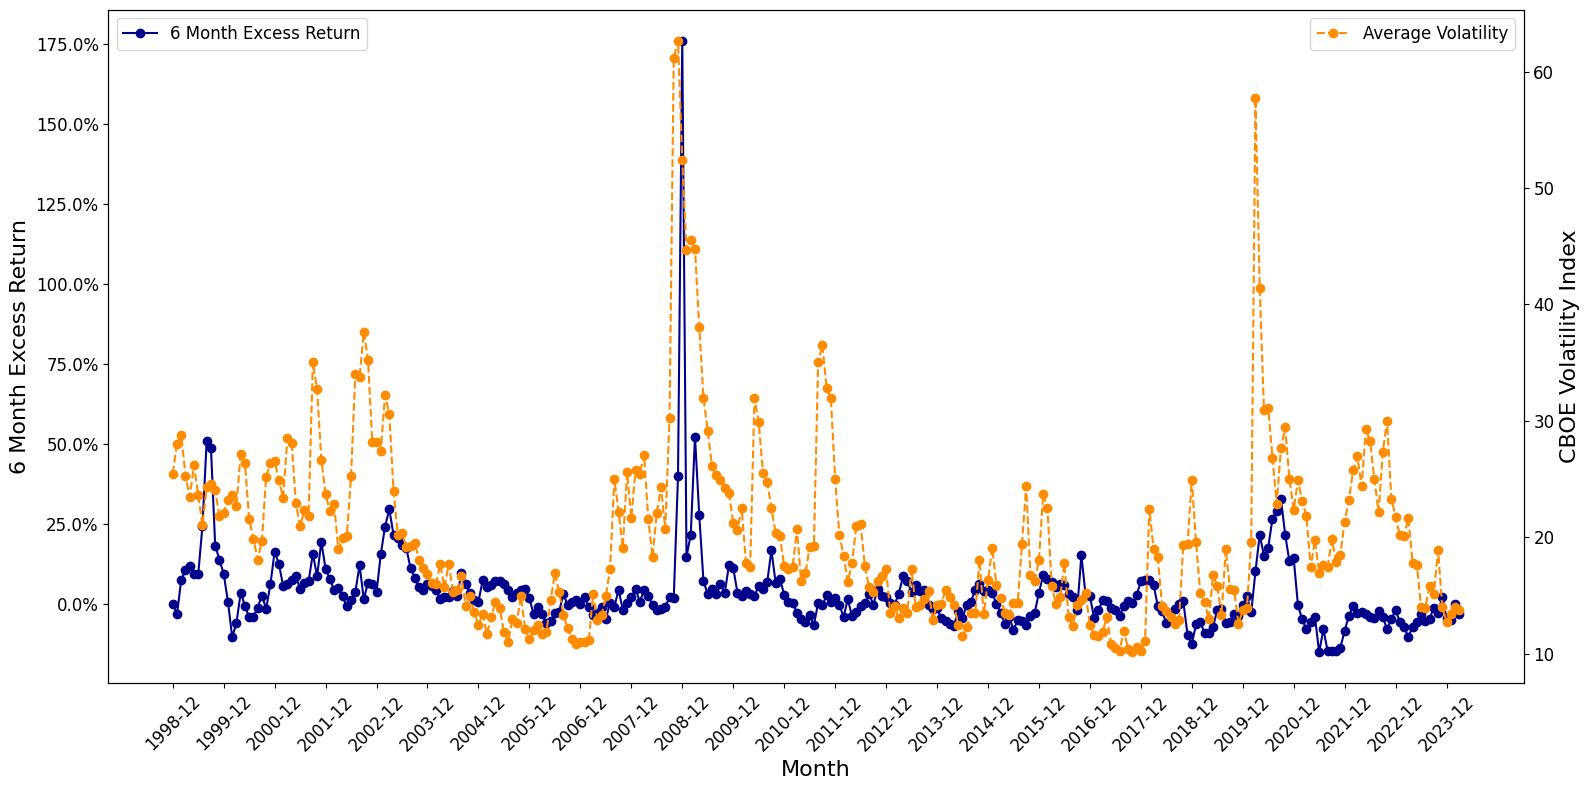

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Convert 'datadate' to datetime for returns data
insiders_df['datadate'] = pd.to_datetime(insiders_df['datadate'])
insiders_df['year_month'] = insiders_df['datadate'].dt.to_period('M')

# Group by 'year_month' and calculate mean of returns
monthly_means = insiders_df.groupby('year_month')[['total_ret_6mo', 'etf_ret', 'net_ret']].mean()
monthly_means.reset_index(inplace=True)
monthly_means['year_month'] = monthly_means['year_month'].astype(str)

# Convert 'date' to datetime for volatility data
vols['date'] = pd.to_datetime(vols['date'])
vols['year_month'] = vols['date'].dt.to_period('M')

# Calculate average volatility (example using 'vix')
vols['average_vol'] = vols[['vix']].mean(axis=1, skipna=True)
monthly_vol_means = vols.groupby('year_month')['average_vol'].mean().reset_index()
monthly_vol_means['year_month'] = monthly_vol_means['year_month'].astype(str)

# Merge with the returns data
monthly_data = pd.merge(monthly_means, monthly_vol_means, on='year_month', how='left')

# Plot
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Net Return
ax1.plot(monthly_data['year_month'], monthly_data['net_ret'], label='6 Month Excess Return', marker='o', linestyle='-', color='darkblue', markersize=6)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('6 Month Excess Return', fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xticks(monthly_data['year_month'][::12])  # Customize x-tick labels as needed
ax1.legend(loc='upper left', fontsize=12)
formatter = mticker.PercentFormatter(xmax=1, decimals=1)
plt.gca().yaxis.set_major_formatter(formatter)

# Optionally enable grid
# ax1.grid(True, linestyle='--', alpha=0.3)

# Plot Average Volatility on the same plot with a second y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_data['year_month'], monthly_data['average_vol'], label='Average Volatility', color='darkorange', marker='o', linestyle='--', markersize=6)
ax2.set_ylabel('CBOE Volatility Index', fontsize=16)
ax2.tick_params(axis='y', labelsize=12)
ax2.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('figures/vol_returns.pdf')
plt.show()